In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [18]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [19]:
#Lambda CDM
LCDM = Class()
LCDM.set({'Omega_cdm':0.25,'Omega_b':0.05})
LCDM.compute()

In [20]:
#Einstein-de Sitter
CDM = Class()
CDM.set({'Omega_cdm':0.95})
CDM.compute()

Omega_lambda = CDM.get_current_derived_parameters(['Omega0_lambda'])
print Omega_lambda

{'Omega0_lambda': 0.0016329077542677206}


In [21]:
#Get background quantities and recover their names:
baLCDM = LCDM.get_background()
baCDM = CDM.get_background()
baCDM.viewkeys()

dict_keys(['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H_prime_prime', 'H_prime', 'conf. time [Mpc]', '(.)rho_ur', '(.)rho_g', '(.)rho_lambda', 'comov. dist.', '(.)rho_cdm', 'ang.diam.dist.', 'proper time [Gyr]', 'gr.fac. D', 'gr.fac. f', 'z', 'comov.snd.hrz.', 'H [1/Mpc]'])

In [22]:
#Get H_0 in order to plot the distances in this unit
fLCDM = LCDM.Hubble(0)
fCDM = CDM.Hubble(0)

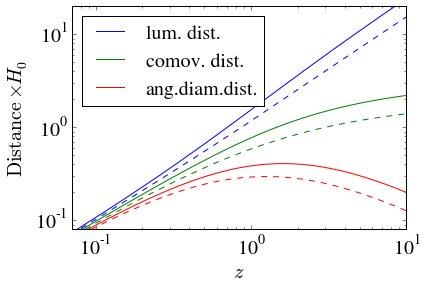

In [23]:
namelist = ['lum. dist.','comov. dist.','ang.diam.dist.']
colours = ['b','g','r']
for name in namelist:
    idx = namelist.index(name)
    plt.loglog(baLCDM['z'],fLCDM*baLCDM[name],colours[idx]+'-')
plt.legend(namelist,loc='upper left')
for name in namelist:
    idx = namelist.index(name)
    plt.loglog(baCDM['z'],fCDM*baCDM[name],colours[idx]+'--')
plt.xlim([0.07, 10])
plt.ylim([0.08, 20])

plt.xlabel(r"$z$")
plt.ylabel(r"$\mathrm{Distance}\times H_0$")